<a href="https://colab.research.google.com/github/QaziSaim/DeepLearning--DeepNeuralNetwork-/blob/main/RegularizationPartToOptimizeTheModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical # it is use for one hot encoding
import keras

In [9]:
datasets=load_iris()
X=datasets.data
y = datasets.target
y = to_categorical(y,num_classes=3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
reg1 = keras.regularizers.L1(l1=0.01)
reg2 = keras.regularizers.L2(l2=0.01)

In [12]:
inputs = Input(shape=(X_train.shape[1],))
layer1 = Dense(10,activation='relu')(inputs)
layer2 = Dense(7,activation='relu')(layer1)
layer3 = Dense(5,activation='relu')(layer2)
outputs = Dense(y_train.shape[1],activation='softmax')(layer3)
model = Model(inputs=inputs,outputs=outputs)

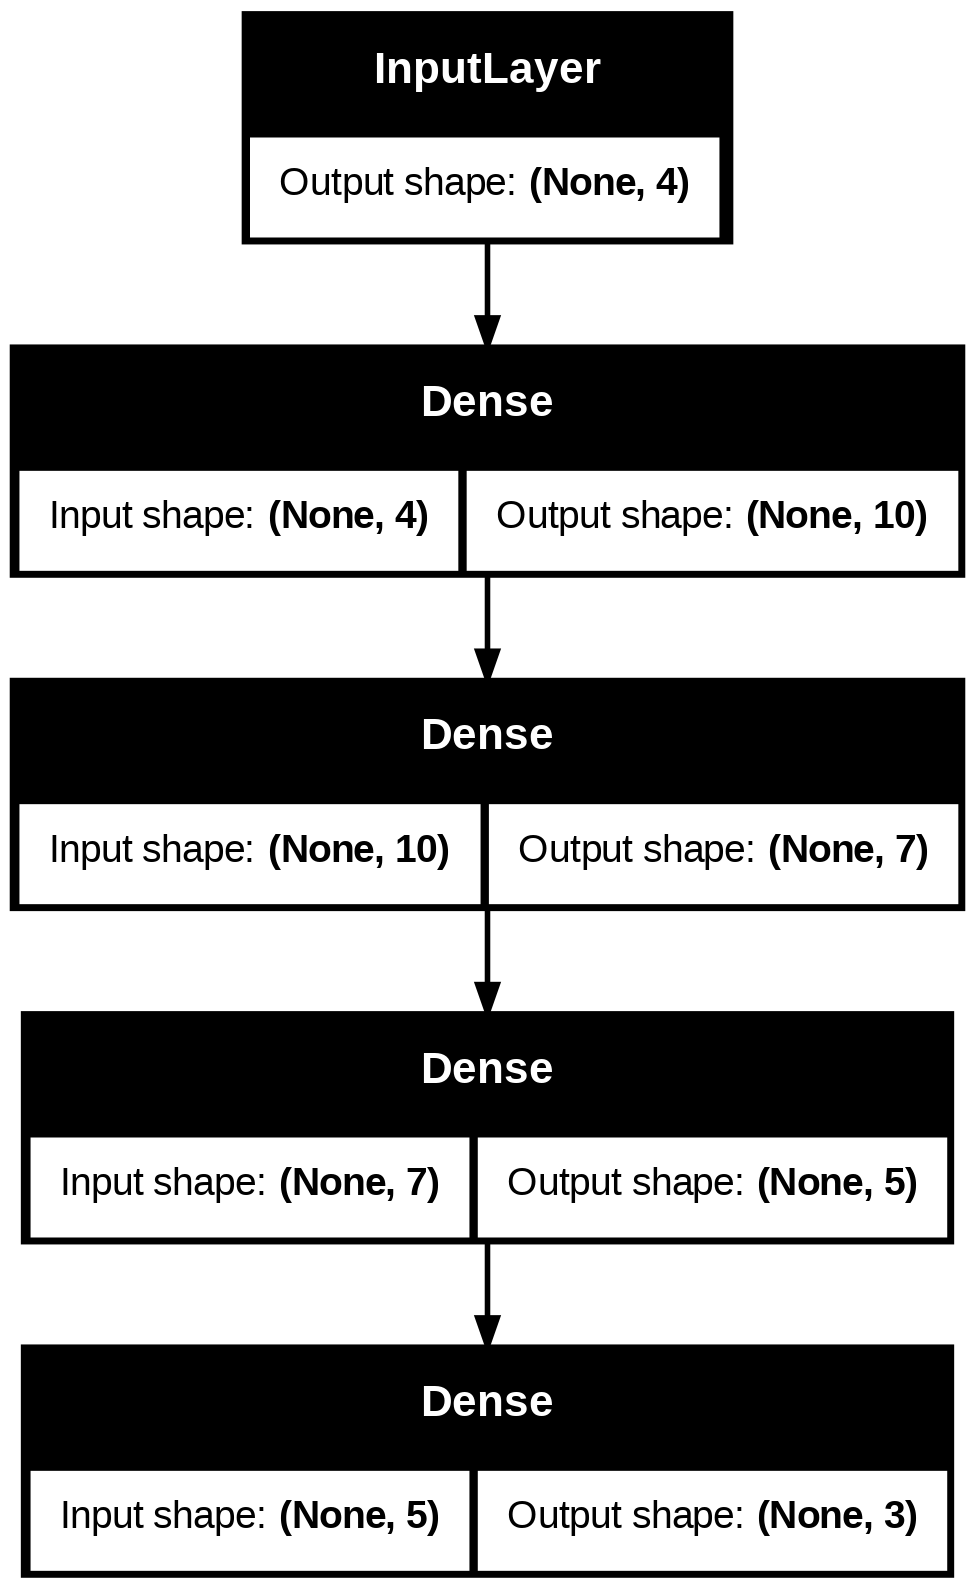

In [14]:
keras.utils.plot_model(model,show_shapes=True)

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
adam = keras.optimizers.Adam(
    learning_rate=0.006,
    beta_1=0.8,
    beta_2=0.989,
)

In [17]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.0829 - loss: 1.1816 - val_accuracy: 0.3111 - val_loss: 1.0799
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2816 - loss: 1.1039 - val_accuracy: 0.5111 - val_loss: 1.0326
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4638 - loss: 1.0686 - val_accuracy: 0.6222 - val_loss: 0.9919
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5678 - loss: 1.0212 - val_accuracy: 0.7111 - val_loss: 0.9364
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6382 - loss: 0.9918 - val_accuracy: 0.7556 - val_loss: 0.8786
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7222 - loss: 0.9425 - val_accuracy: 0.7778 - val_loss: 0.8105
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7048 - loss: 0.8990 - val_accuracy: 0.8222 - val_loss: 0.7469
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7732 - loss: 0.8266 - val_accuracy: 0.8444 - val_loss: 0.6945

In [19]:
loss,accuracy = model.evaluate(X_test,y_test,verbose=0)

In [20]:
loss

0.11544571071863174

In [21]:
accuracy

0.9777777791023254